In [1]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import os

In [2]:
class Colors:
    def __init__(self, red, green, yellow, blue, magenta, cyan, white, default):
        self.red = red
        self.green = green
        self.yellow = yellow
        self.blue = blue
        self.magenta = magenta
        self.cyan = cyan
        self.white = white
        self.default = default

colors = Colors(
    red="\x1b[31m",
    green="\x1b[32m",
    yellow="\x1b[33m",
    blue="\x1b[34m",
    magenta="\x1b[35m",
    cyan="\x1b[36m",
    white="\x1b[37m",
    default="\x1b[0m")

In [3]:
inputField = widgets.Text(
    value='',
    placeholder='Y/N',
    description='Want to save the images?',
    layout=widgets.Layout(width='200px')
)

In [4]:
def displayImage(img):
    resized_img = img.resize((128, 128))
    display(resized_img)

In [5]:
def printError(errMessage: str, err):
  return f"{colors.red}Error: {colors.white}{errMessage}.{colors.default}\n{err}"

In [6]:
def saveImages(path: str, grayScale: Image.Image, binary: Image.Image, option: str):
  if option != 'Y' and option != 'N':
    print(printError('Invalid option', 'Y/N'))
    return
  if option == 'N':
    return
  try:
    outputDir = 'output'
    os.makedirs(outputDir, exist_ok=True)

    originalName = os.path.splitext(os.path.basename(path))[0]

    grayScale.save(os.path.join(outputDir, f"{originalName}_grayScale.png"))
    binary.save(os.path.join(outputDir, f"{originalName}_binary.png"))
    print(f"{colors.green}Success: {colors.white}Images saved in: {colors.blue}{outputDir}")
  except Exception as ex:
    print(printError('Failed to save files', ex))

In [7]:
def convertImage(path: str):
  if not os.path.exists(path):
    print(printError('File not exists', path))
    return
  try:
    img = Image.open(path)
  except Exception as ex:
    print(printError('Failed to open file', ex))
    return

  grayScale = img.convert('L')

  binary = grayScale.copy()

  threshold = int(sum(i * v for i, v in enumerate(grayScale.histogram())) / sum(grayScale.histogram()))

  for x in range(binary.size[0]):
    for y in range(binary.size[1]):
      if binary.getpixel((x, y)) < threshold:
        binary.putpixel((x, y), 0)
      else:
        binary.putpixel((x, y), 255)

  displayImage(img)
  displayImage(grayScale)
  displayImage(binary)

  display(inputField)
  button = widgets.Button(description="Submit")
  display(button)
  button.on_click(lambda b: saveImages(path=path, grayScale=grayScale, binary=binary, option=inputField.value.strip().upper()))

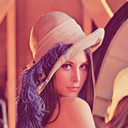

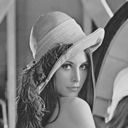

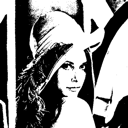

Text(value='', description='Want to save the images?', layout=Layout(width='200px'), placeholder='Y/N')

Button(description='Submit', style=ButtonStyle())

Success: Images saved in: output


In [8]:
convertImage('Lenna.png')